In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Exploratory Data Analysis

## CATEGORIES

### Load and View Data

In [298]:
df=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Clean_Data.csv")

df

,Date,Year,Month,Time,WeekDay,Offense_Category,NIBRS_Crime_Against,Ward,Crime_Count
0,2019-01-01,2019,1,07:53:00,1,Assault Offenses,Person,10.0,1
1,2019-01-04,2019,1,10:07:00,4,Destruction/Damage/Vandalism of Property,Property,3.0,1
2,2019-01-01,2019,1,03:23:00,1,Destruction/Damage/Vandalism of Property,Property,1.0,1
3,2019-01-02,2019,1,04:04:00,2,Larceny/Theft Offenses,Property,1.0,1
4,2019-01-04,2019,1,05:27:00,4,Stolen Property Offenses,Property,4.0,1
...,...,...,...,...,...,...,...,...,...
264089,2025-03-06,2025,3,21:19:00,3,Larceny/Theft Offenses,Property,10.0,1
264090,2025-03-07,2025,3,13:04:00,4,Larceny/Theft Offenses,Property,12.0,1
264091,2025-03-08,2025,3,11:57:00,5,Destruction/Damage/Vandalism of Property,Property,8.0,1
264092,2025-03-10,2025,3,11:44:00,0,Larceny/Theft Offenses,Property,8.0,1


### Plotting Across wards
Stacked Bar Plot

Text(0, 0.5, 'Number of Reported Crimes\n')

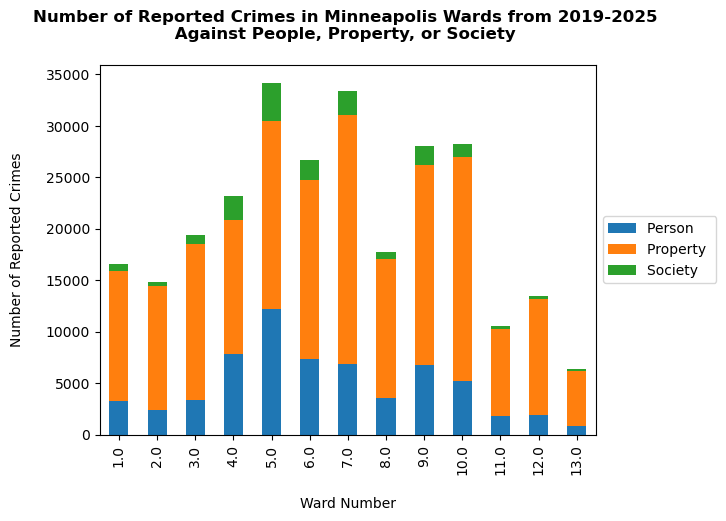

In [299]:

df_counts = df.groupby(['Ward','NIBRS_Crime_Against'])['Crime_Count'].sum().unstack(fill_value=0)
ax= df_counts.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Number of Reported Crimes in Minneapolis Wards from 2019-2025 \n Against People, Property, or Society  \n",weight='bold')
ax.set_xlabel("\nWard Number")
ax.set_ylabel("Number of Reported Crimes\n")

### Plotting the distribution of offenses 
Bar plot

Text(0, 0.5, 'Offense Category')

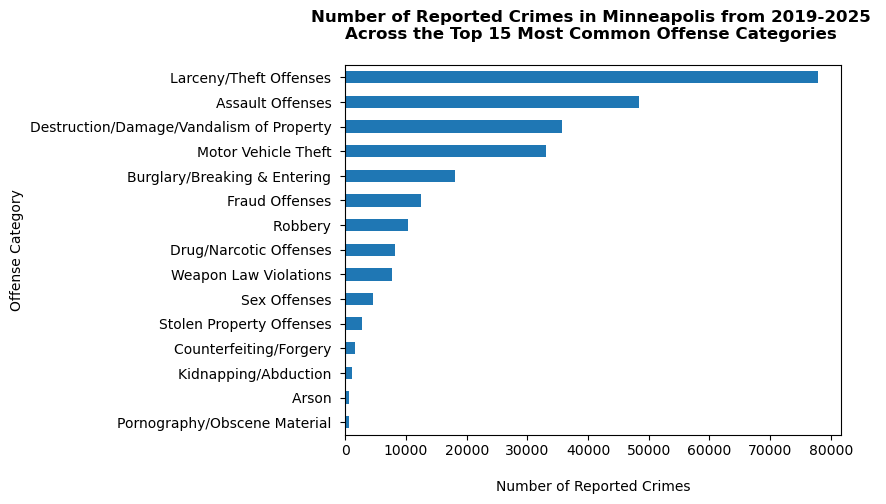

In [300]:
#FIX PLOT
#ax=df.groupby('Offense_Category')['Crime_Count'].sum().sort_values().plot(kind='barh')
ax= df.Offense_Category.value_counts()[:15].sort_values().plot(kind = 'barh')
ax.set_title("Number of Reported Crimes in Minneapolis from 2019-2025 \nAcross the Top 15 Most Common Offense Categories \n",weight='bold')
ax.set_xlabel("\nNumber of Reported Crimes")
ax.set_ylabel("Offense Category")

## TIME

In [301]:
dates=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Univ_Date.csv")

### Plotting the crime counts across Month

Text(0, 0.5, '\nNumber of Reported Crimes\n')

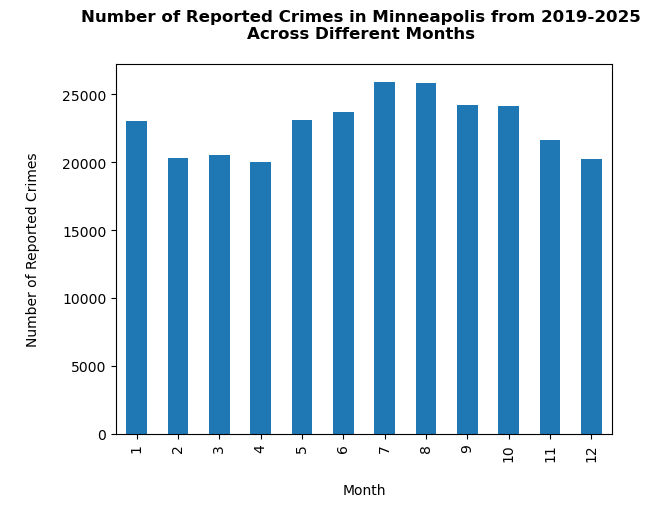

In [302]:
ax=df.groupby('Month')['Crime_Count'].sum().plot(kind='bar')
ax.set_title("Number of Reported Crimes in Minneapolis from 2019-2025 \nAcross Different Months \n",weight='bold')
ax.set_xlabel("\nMonth")
ax.set_ylabel("\nNumber of Reported Crimes\n")

### Plotting the crime counts across Weekday

Text(0, 0.5, '\nNumber of Reported Crimes\n')

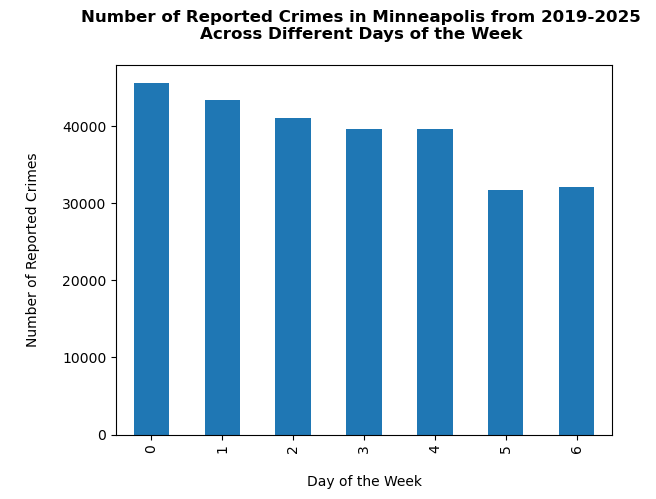

In [303]:
ax=df.groupby('WeekDay')['Crime_Count'].sum().plot(kind='bar')
ax.set_title("Number of Reported Crimes in Minneapolis from 2019-2025 \nAcross Different Days of the Week \n",weight='bold')
ax.set_xlabel("\nDay of the Week")
ax.set_ylabel("\nNumber of Reported Crimes\n")

### Plotting the crime by date  (time series plot)

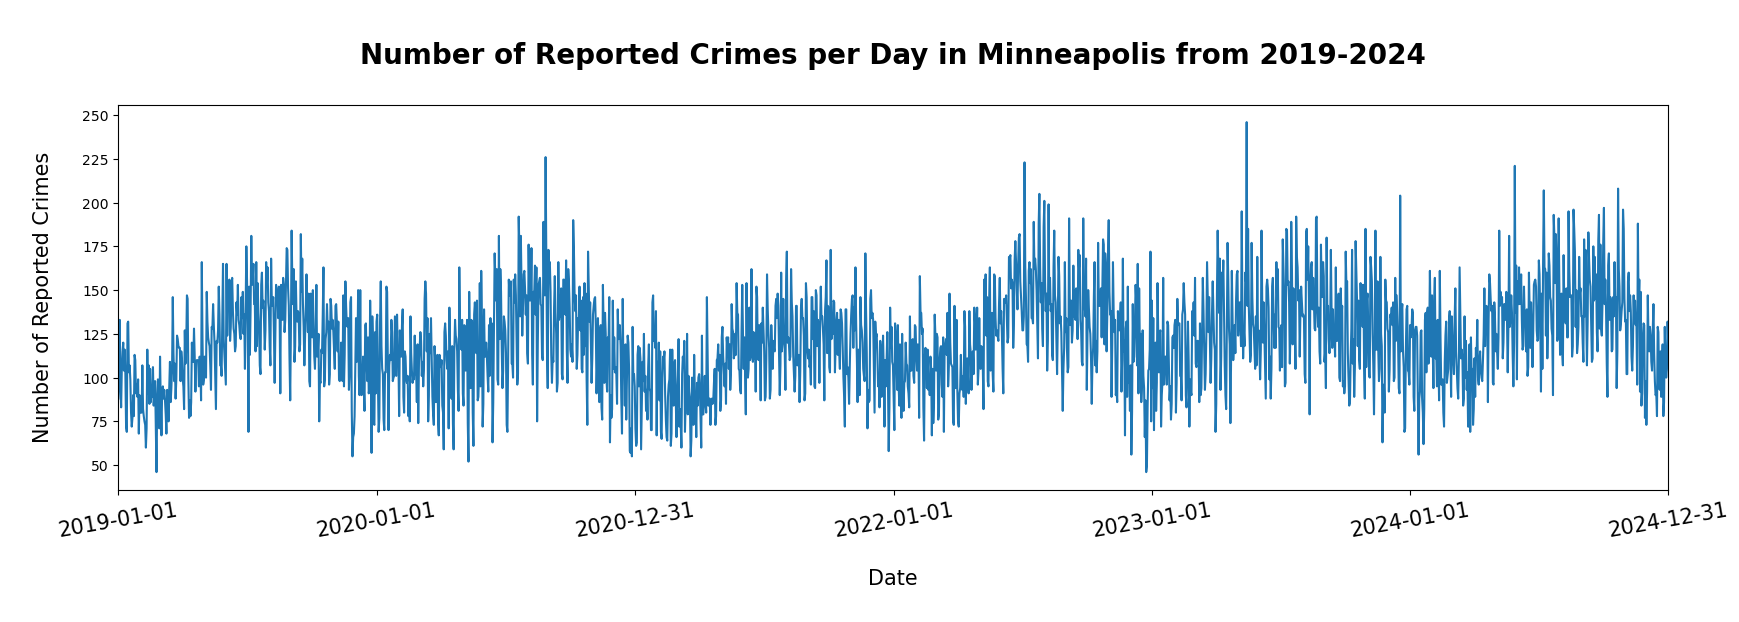

In [304]:
fig, ax=plt.subplots(figsize=(20, 5))
ax.plot(dates['Date'], dates['Crime_Count'])
plt.xticks(rotation=10, fontsize=15)

years = mdates.YearLocator()  
ax.xaxis.set_major_locator(years)

ax.set_xlim('2019-01-01', '2024-12-31')
ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2024\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})

plt.show()

Text(0, 0.5, '\nNumber of Reported Crimes\n')

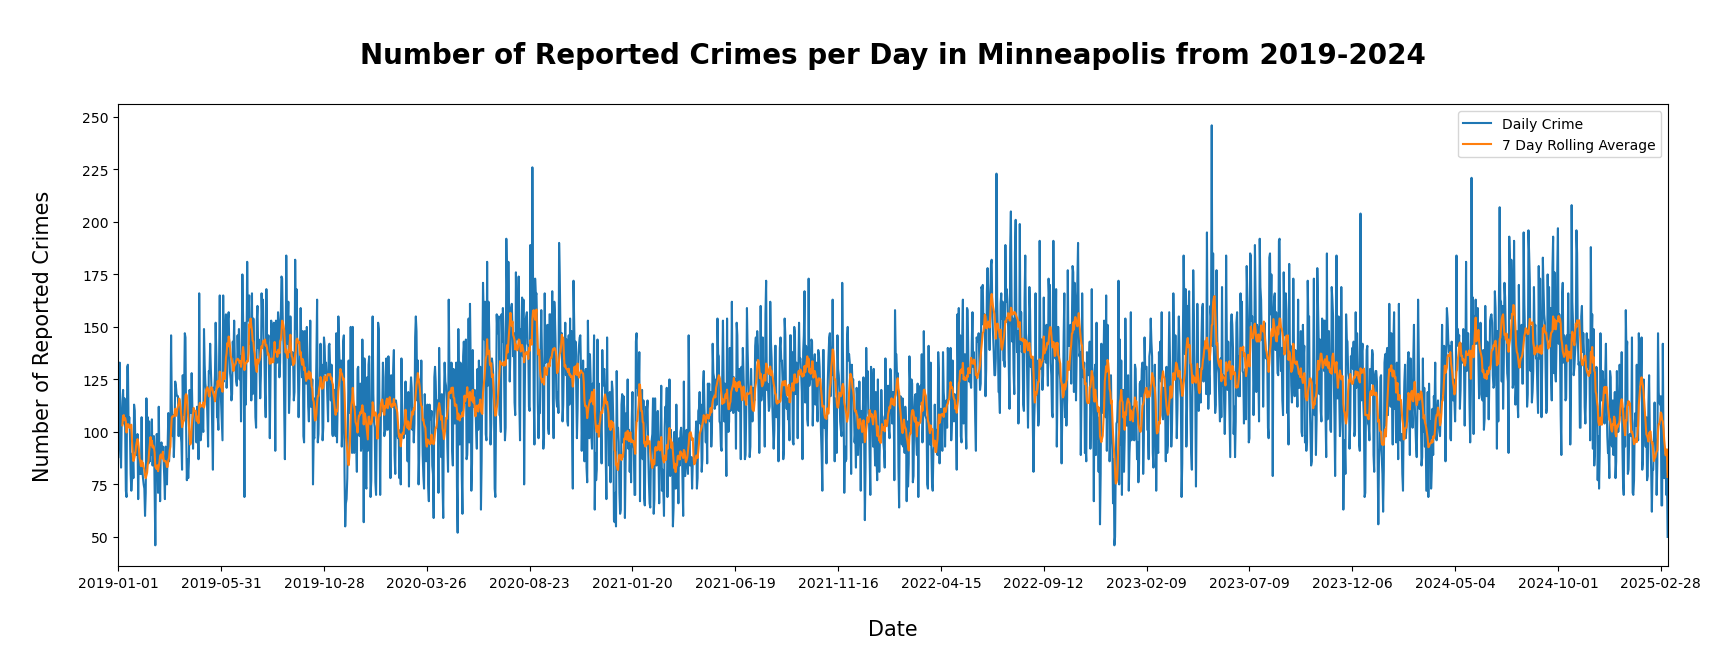

In [319]:
import seaborn as sns
# computing a 7 day rolling average 
dates[ '7day_rolling_avg' ] = dates.Crime_Count.rolling(7).mean() 
plt.subplots(figsize=(20, 6))
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'Date', 
             y = 'Crime_Count', 
             data = dates, 
             label = 'Daily Crime') 
  
# plot using rolling average 
sns.lineplot( x = 'Date', 
             y = '7day_rolling_avg', 
             data = dates, 
             label = '7 Day Rolling Average') 
  
plt.xlabel("\nDate\n",fontdict={'fontsize':15}) 
plt.xlim(0,len(dates))

plt.xticks(ticks=range(0, len(dates), 150)) 
plt.title('\nNumber of Reported Crimes per Day in Minneapolis from 2019-2024\n',weight='bold',fontdict={'fontsize':20})
  
plt.ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})

## Summary statistics of each crime type per year 
Table

In [306]:
table = pd.pivot_table(df, values='Crime_Count', index=['Year'], columns=['NIBRS_Crime_Against'], aggfunc="sum")
table

NIBRS_Crime_Against,Person,Property,Society
Year,,,
2019,10148,29163,3411
2020,10008,30527,2945
2021,9527,28402,2485
2022,10377,32462,2586
2023,10694,33367,2707
2024,10853,33928,2203
2025,1716,4897,345
